In [137]:
import numpy as np
import gensim
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline

In [150]:
np.__version__

'1.15.4'

In [151]:
gensim.__version__

'3.7.0'

Let's load pretrained bert token vectors and project them to 2d space using tSNE.

# Load data

In [181]:
f = "bert-base-uncased.30522.768d.vec"
# f = 'bert-base-cased.28996.768d.vec'
# f = 'bert-base-multilingual-uncased.105879.768d.vec'
# f = 'bert-base-chinese.21128.768d.vec'
# f = 'bert-base-multilingual-cased.119547.768d.vec'
# f = 'bert-base-uncased.30522.768d.vec'
# f = 'bert-large-cased.28996.1024d.vec'

In [135]:
model = gensim.models.KeyedVectors.load_word2vec_format(f, binary=False)

# Find most related tokens

In [191]:
model.most_similar("look")

[('feel', 0.4074964225292206),
 ('style', 0.3370037078857422),
 ('get', 0.32385802268981934),
 ('think', 0.3120831251144409),
 ('work', 0.3055831491947174),
 ('pose', 0.2996072769165039),
 ('point', 0.2994779348373413),
 ('follow', 0.29945236444473267),
 ('fashion', 0.29616934061050415),
 ('eyes', 0.2930969297885895)]

# Plot

In [183]:

def tsne(query, topn=10):
    results = model.wv.similar_by_word(query, topn=topn)
    words = [query]+[r[0] for r in results]
    wordvectors = np.array(model[query]+[model[w] for w in words], np.float32)
    reduced = TSNE(n_components=2).fit_transform(wordvectors)
    plt.figure(figsize=(20, 20), dpi=100)
    max_x = np.amax(reduced, axis=0)[0]
    max_y = np.amax(reduced, axis=0)[1]
    plt.xlim((-max_x, max_x))
    plt.ylim((-max_y, max_y))
    plt.scatter(reduced[:, 0], reduced[:, 1], s=20, c=["r"] + ["b"]*(len(reduced)-1))
    
    for i in range(len(words)):
        target_word = words[i]
        # print(target_word)
        x = reduced[i, 0]
        y = reduced[i, 1]
        plt.annotate(target_word, (x, y))
    plt.axis('off')

    plt.show()

/Users/ryan/pytorch1.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


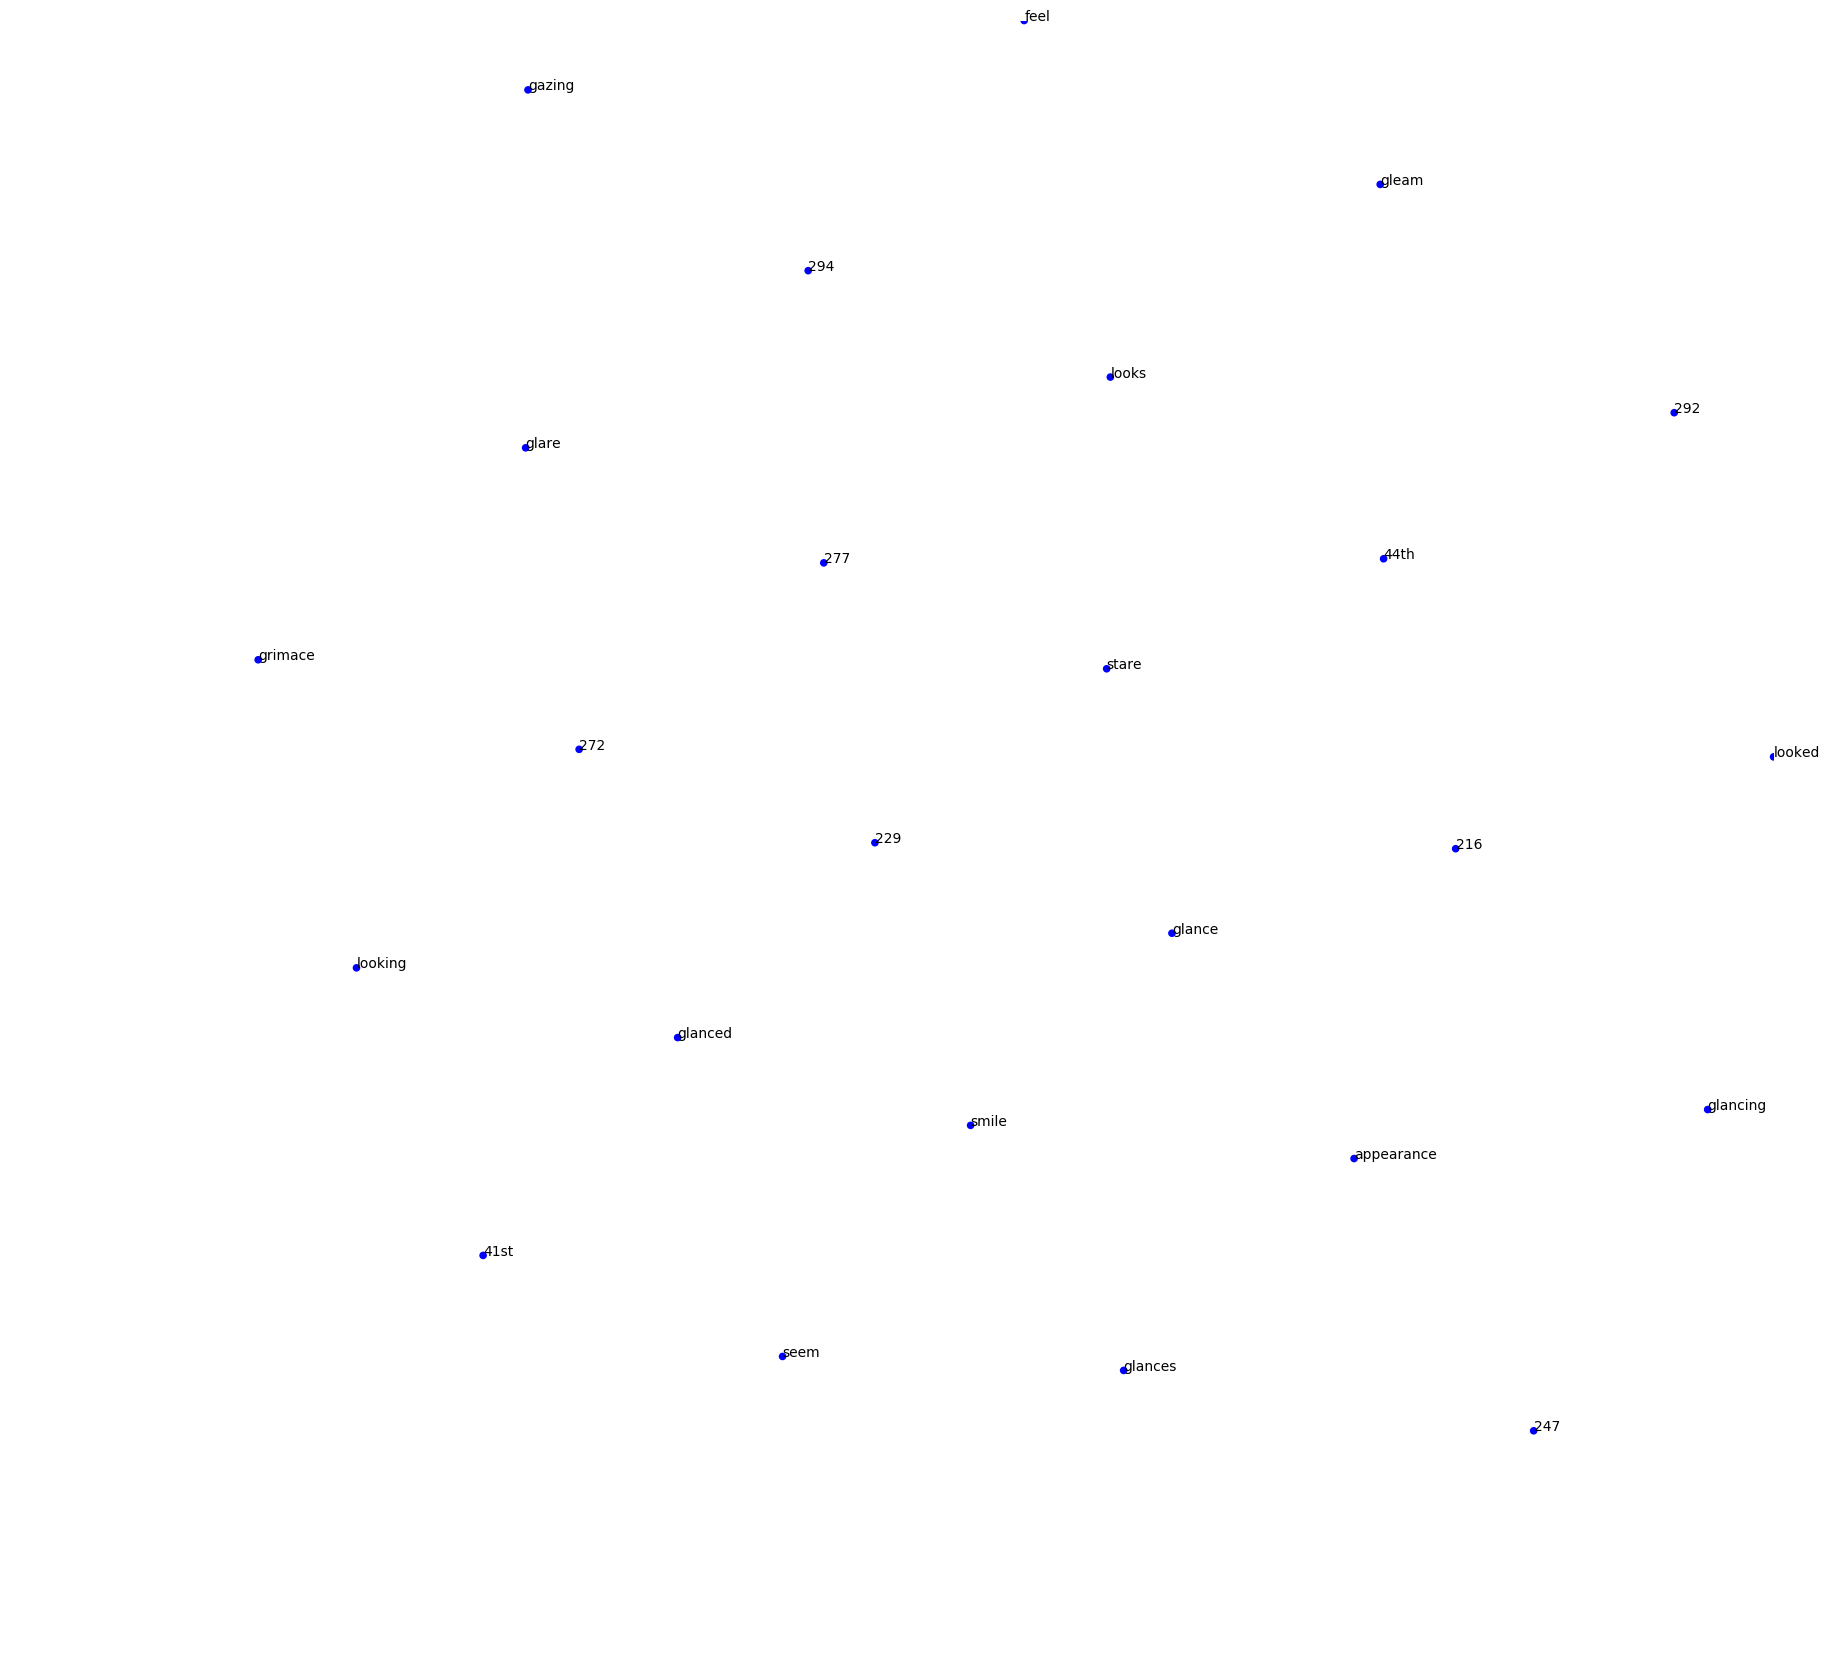

In [182]:
tsne("look", 30)

/Users/ryan/pytorch1.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


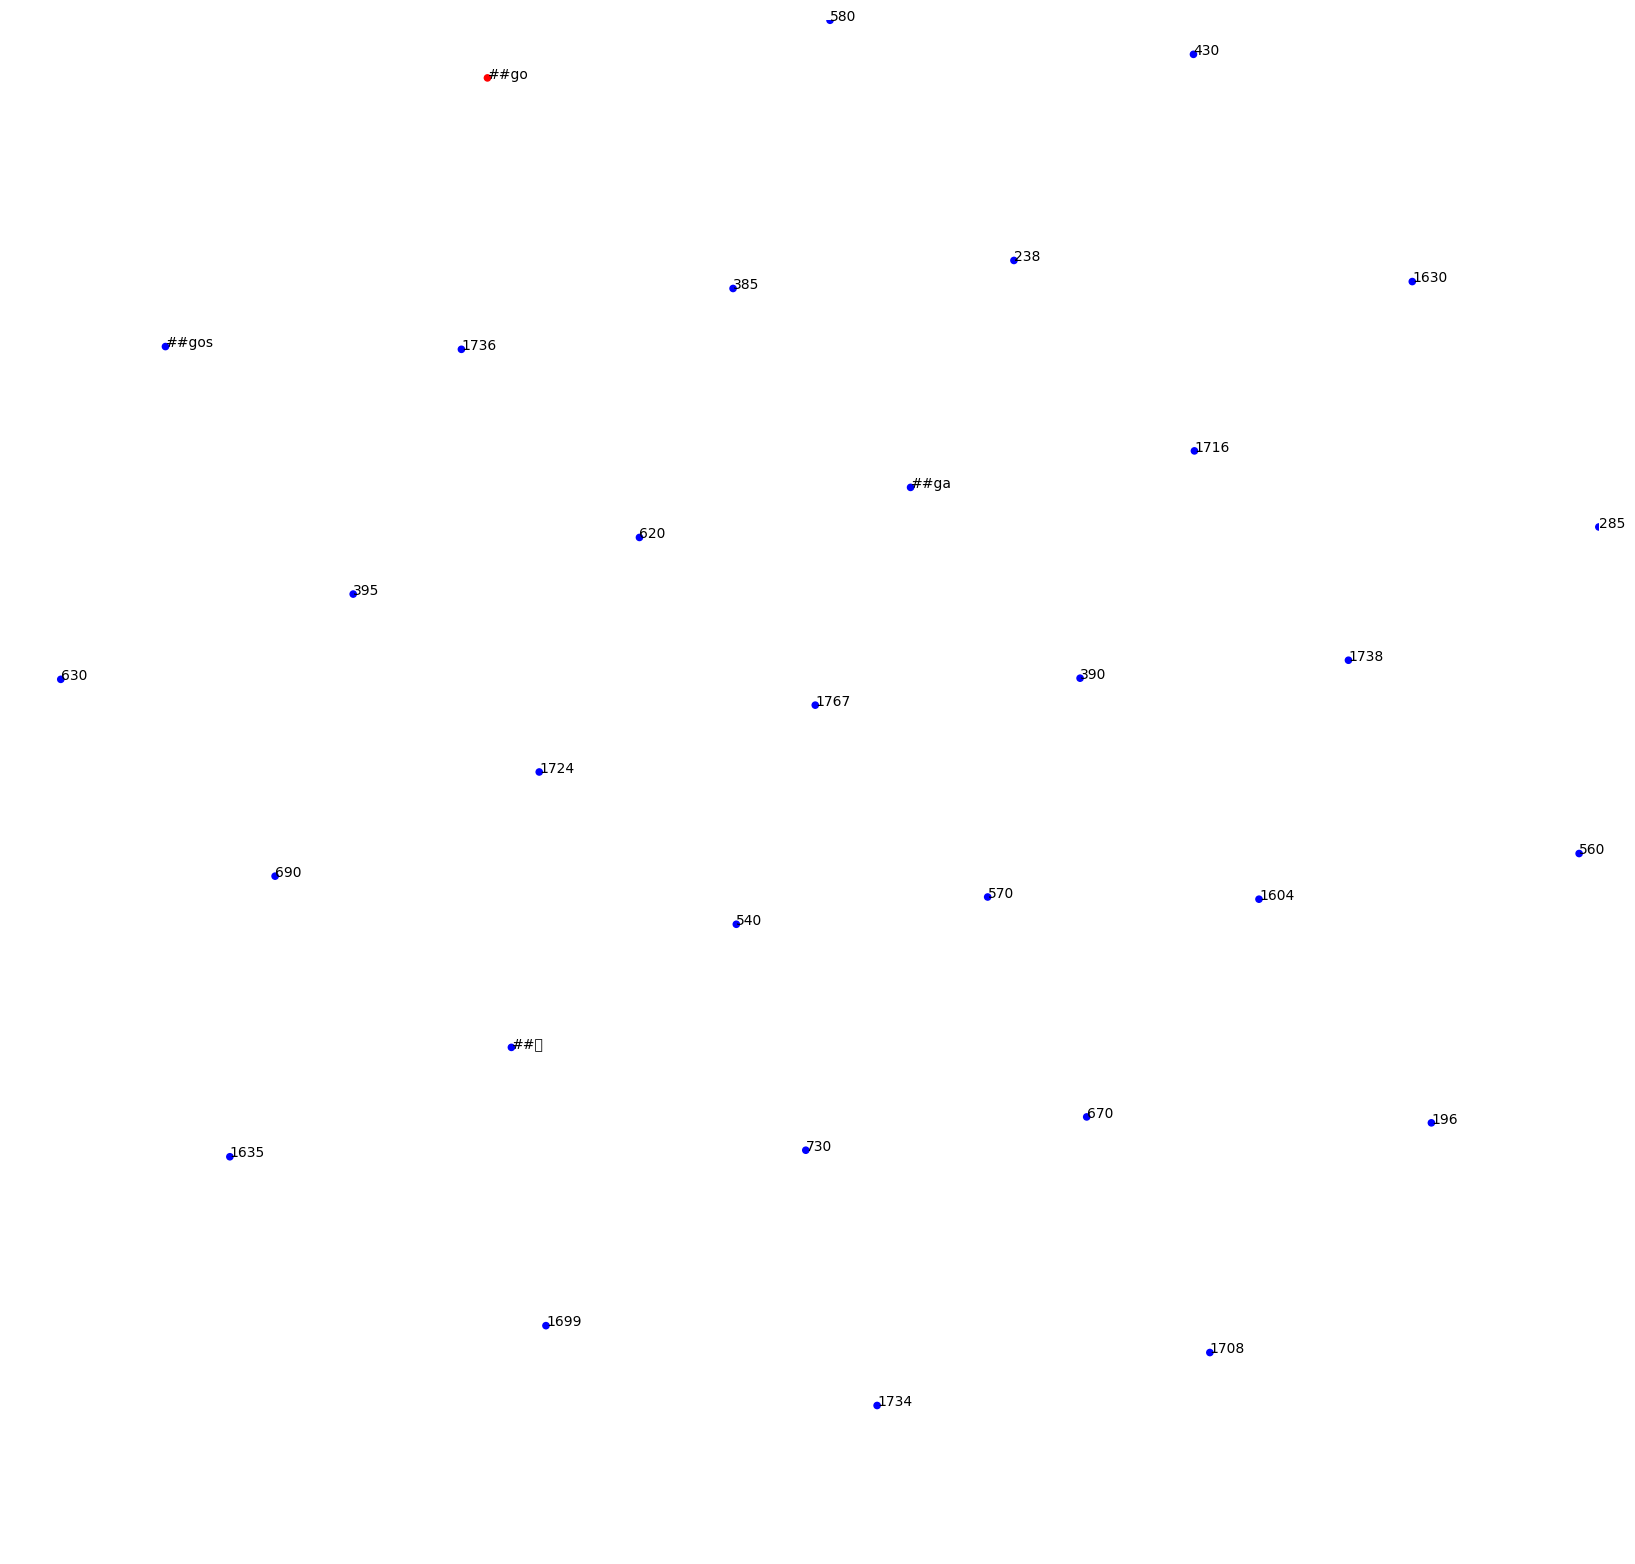

In [176]:
tsne("##go", 30)